In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn import tree
from graphviz import Digraph


import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline

/Users/Singsing/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dataframe = pd.read_csv('Final.csv')

In [3]:
columns = [
 'AdjDE_x',
 'AdjDE_y',
 'AdjOE_x',
 'AdjOE_y',
 'AdjTempo_x',
 'AdjTempo_y',
 'Pythag_x',
 'Pythag_y',
 'team1_fg2pct',
 'team1_fg3pct',
 'team1_ftpct',
 'team2_fg2pct',
 'team2_fg3pct',
 'team2_ftpct',
 'x_pt_team_season_losses',
 'x_pt_team_season_wins',
 'x_rpi_rating',
 'x_seed',
 'y_pt_team_season_losses',
 'y_pt_team_season_wins',
 'y_rpi_rating',
 'y_seed']

fantastic_four = ['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']

In [4]:
X = dataframe[columns]

Y = dataframe.Result
Y = np.ravel(Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print len(X_train), len(Y_train), len(X_test), len(Y_test)

557 557 240 240


In [6]:
log_reg = LogisticRegression()
rand_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()
bag_class = BaggingClassifier()
naive_bay = GaussianNB()
k_near_n = KNeighborsClassifier()

<h1><b>LOGISTIC REGRESSION</b></h1>

In [7]:
log_reg_RFE = RFE(log_reg, 6)
log_reg_RFE.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

log_reg_RFE_df = pd.DataFrame()

log_reg_RFE_df['Rank'] = log_reg_RFE.ranking_
log_reg_RFE_df['Feature'] = X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']].columns
log_reg_RFE_df['Support'] = log_reg_RFE.support_
log_reg_RFE_df[log_reg_RFE_df.Support == True]


,Rank,Feature,Support
0,1,Pythag_x,True
1,1,Pythag_y,True
2,1,x_rpi_rating,True
3,1,y_rpi_rating,True


In [8]:
print 'Logistic Regression model accuracy: ' + str(log_reg_RFE.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Logistic Regression model accuracy: 0.770833333333


In [9]:
log_reg_export = pd.DataFrame(log_reg_RFE.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
log_reg_export['GameID'] = dataframe.game_id
log_reg_export['Season'] = dataframe.season
log_reg_export['Actual_Result'] = dataframe.Result

In [10]:
log_reg_export.to_csv('Logistic_Regression_Test.csv')

<h1><b>DECISION TREE</b></h1>

In [11]:
dec_tree_RFE = RFE(dec_tree, 4)
dec_tree_RFE.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

dec_tree_RFE_df = pd.DataFrame()

dec_tree_RFE_df['Rank'] = dec_tree_RFE.ranking_
dec_tree_RFE_df['Feature'] = X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']].columns
dec_tree_RFE_df['Support'] = dec_tree_RFE.support_
dec_tree_RFE_df[dec_tree_RFE_df.Support == True]

,Rank,Feature,Support
0,1,Pythag_x,True
1,1,Pythag_y,True
2,1,x_rpi_rating,True
3,1,y_rpi_rating,True


In [12]:
print 'Decision Tree model accuracy: ' + str(dec_tree_RFE.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Decision Tree model accuracy: 0.741666666667


In [13]:
dec_tree_export = pd.DataFrame(dec_tree_RFE.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
dec_tree_export['GameID'] = dataframe.game_id
dec_tree_export['Season'] = dataframe.season
dec_tree_export['Actual_Result'] = dataframe.Result

In [14]:
dec_tree_export.to_csv('Decision_Tree_test.csv')

<h1><b>NAIVE BAYES</b></h1>

In [15]:
naive_bay.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

print 'Naive Baye model accuracy: ' + str(naive_bay.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Naive Baye model accuracy: 0.8


In [16]:
naive_bay_export = pd.DataFrame(naive_bay.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
naive_bay_export['GameID'] = dataframe.game_id
naive_bay_export['Season'] = dataframe.season
naive_bay_export['Actual_Result'] = dataframe.Result

In [17]:
naive_bay_export.to_csv('Naive_Bay_test.csv')

<h1><b>K NEAREST NEIGHBOR CLASSIFIER</b></h1>

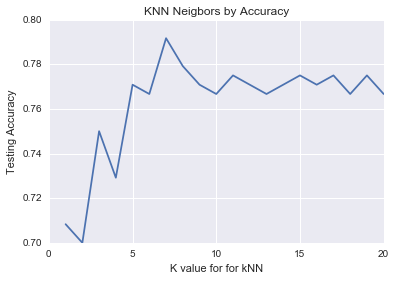

In [20]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    k_near_n = KNeighborsClassifier(n_neighbors= k)
    k_near_n.fit(X_train[fantastic_four], Y_train)
    Y_pred = k_near_n.predict(X_test[fantastic_four])
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

plt.title('KNN Neigbors by Accuracy')
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [23]:
k_near_n = KNeighborsClassifier(n_neighbors= 7)
k_near_n.fit(X_train[fantastic_four], Y_train)
print 'KNN model accuracy: ' + str(k_near_n.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

KNN model accuracy: 0.791666666667


In [24]:
knn_export = pd.DataFrame(k_near_n.predict_proba(X[fantastic_four]))
knn_export['GameID'] = dataframe.game_id
knn_export['Season'] = dataframe.season
knn_export['Actual_Result'] = dataframe.Result

In [25]:
knn_export.to_csv('KNN_test.csv')

<h1><b>RANDOM FOREST</b></h1>

In [54]:
rand_for.fit(X_train[fantastic_four], Y_train)

rand_for_df = pd.DataFrame()

rand_for_df['Feature'] = X_train[fantastic_four].columns
rand_for_df['Rank'] = rand_for.feature_importances_
rand_for_df.sort_values('Rank', inplace= True)

In [55]:
print 'Random forest model accuracy: ' + str(rand_for.score(X_test[fantastic_four], Y_test))

Random forest model accuracy: 0.783333333333


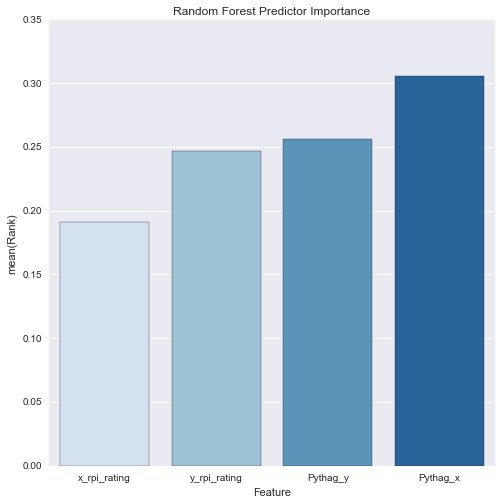

In [59]:
plt.figure(figsize=(8,8))
plt.title('Random Forest Predictor Importance')
sns.barplot(x= 'Feature', y = 'Rank', data = rand_for_df, palette= 'Blues')

In [60]:
rand_for_export = pd.DataFrame(rand_for.predict_proba(X[fantastic_four]))
rand_for_export['GameID'] = dataframe.game_id
rand_for_export['Season'] = dataframe.season
rand_for_export['Actual_Result'] = dataframe.Result

In [62]:
rand_for_export.to_csv('Random_Forest_test.csv')

<h1><b>BAGGING CLASSIFIER</b></h1>

In [88]:
bag_class_RFE = RFE(dec_tree, 4)
bag_class_RFE.fit(X_train, Y_train)

bag_class_RFE_df = pd.DataFrame()

bag_class_RFE_df['Rank'] = bag_class_RFE.ranking_
bag_class_RFE_df['Feature'] = X_train.columns
bag_class_RFE_df['Support'] = bag_class_RFE.support_
bag_class_RFE_df[bag_class_RFE_df.Support == True]

,Rank,Feature,Support
6,1,Pythag_x,True
7,1,Pythag_y,True
16,1,x_rpi_rating,True
20,1,y_rpi_rating,True


In [89]:
print 'Bagging Cassifier accuracy: ' + str(bag_class_RFE.score(X_test, Y_test))

Bagging Cassifier accuracy: 0.7625


In [96]:
bag_class_export = pd.DataFrame(bag_class_RFE.predict_proba(X))
bag_class_export['GameID'] = dataframe.game_id
bag_class_export['Season'] = dataframe.season
bag_class_export['Actual_Result'] = dataframe.Result

In [98]:
bag_class_export.to_csv('Bag_Class_test.csv')